In [ ]:
!pip install stop-words wordcloud matplotlib seaborn scikit-learn pandas


# Análise Exploratória do Dataset HP

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from stop_words import get_stop_words
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline


# carregar dataset
df = pd.read_csv('/content/data/dataset_hp.csv', sep=';')
df.head()

,id,data_cadastro,title,price,description,seller,review_rating,review_amount,url,positive_occurrences,negative_occurrences,label
0,1,2025-06-08 01:19:54,Cartucho Hp 3ed70a Nº712 Preto 38ml Hp,260.91,O Cartucho HP 712 Preto 38ml 3ED70A é a escolh...,INK LASER INFO,4.8,28,https://www.mercadolivre.com.br/cartucho-hp-3e...,0,0,original
1,2,2025-06-08 01:19:59,Cartucho De Tinta 951 Magenta Hp 276dw 8100 86...,184.90,Cartucho HP 951 magenta CN051AB 8ml\n\nCompati...,Tec Print,4.4,5,https://www.mercadolivre.com.br/cartucho-de-ti...,0,0,suspeito
2,3,2025-06-08 01:20:03,Cartucho De Tinta Hp 711 Cor Azul Do 29 Ml,279.00,Características do Produto\n\nImpressões com Q...,OBERO INFORMATICA,4.6,28,https://www.mercadolivre.com.br/cartucho-de-ti...,9,0,suspeito
3,4,2025-06-08 01:20:07,Cartucho Hp 667 Colorido 3ym78ab,71.90,Características do Produto:\nVolume de páginas...,VANMASTERCOMERCIO,4.7,"1,869",https://www.mercadolivre.com.br/cartucho-hp-66...,14,0,suspeito
4,5,2025-06-08 01:20:11,Cartucho HP 664 preto(F6V29AB) Para Deskjet 45...,64.90,cartucho HP 664 Preto(F6V29A) 2ml\n\n\nEspecif...,VANMASTERCOMERCIO,4.7,"2,005",https://www.mercadolivre.com.br/cartucho-hp-66...,6,0,suspeito


## Limpeza e resumo

In [75]:
df['label'] = df['label'].astype('category')
df['review_rating'] = df['review_rating'].astype(str).str.replace('[^\d,]', '', regex=True).str.replace(',', '.', regex=False).astype(float)
df['review_amount'] = df['review_amount'].astype(str).str.replace('[^\d,]', '', regex=True).str.replace(',', '.', regex=False).astype(float)
df['price'] = df['price'].astype(float)
df = df.rename(columns={'url.1':'product_url'})

df.describe(include='all')

,id,data_cadastro,title,price,description,seller,review_rating,review_amount,url,positive_occurrences,negative_occurrences,label
count,68.00000,68,68,68.000000,62,68,68.000000,68.000000,68,68.000000,68.000000,68
unique,NaN,68,44,NaN,42,17,NaN,NaN,56,NaN,NaN,2
top,NaN,2025-06-08 01:19:54,Cartucho Hp 3ed70a Nº712 Preto 38ml Hp,NaN,O Cartucho HP 712 Preto 38ml 3ED70A é a escolh...,OBERO INFORMATICA,NaN,NaN,https://www.mercadolivre.com.br/cartucho-hp-66...,NaN,NaN,suspeito
freq,NaN,1,4,NaN,4,23,NaN,NaN,3,NaN,NaN,40
mean,34.50000,NaN,NaN,299.096897,NaN,NaN,47.117647,48.884147,NaN,2.558824,0.014706,NaN
std,19.77372,NaN,NaN,260.807442,NaN,NaN,1.928029,95.307962,NaN,3.596774,0.121268,NaN
min,1.00000,NaN,NaN,1.349000,NaN,NaN,40.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,17.75000,NaN,NaN,107.200000,NaN,NaN,46.000000,3.299000,NaN,0.000000,0.000000,NaN
50%,34.50000,NaN,NaN,219.000000,NaN,NaN,47.000000,14.500000,NaN,0.000000,0.000000,NaN
75%,51.25000,NaN,NaN,389.742500,NaN,NaN,48.000000,32.500000,NaN,5.000000,0.000000,NaN


## Distribuição de Preços

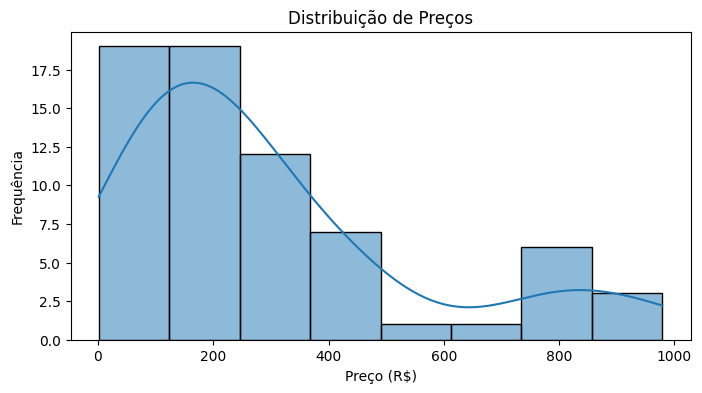

In [76]:
plt.figure(figsize=(8,4))
sns.histplot(df['price'], kde=True)
plt.title('Distribuição de Preços')
plt.xlabel('Preço (R$)')
plt.ylabel('Frequência')
plt.show()

## Frequência de Palavras nos Títulos

Top 10 palavras mais frequentes:
hp           75
cartucho     53
tinta        39
preto        32
kit          18
664          14
cartuchos    12
ml           12
667          11
colorido     10
dtype: int64


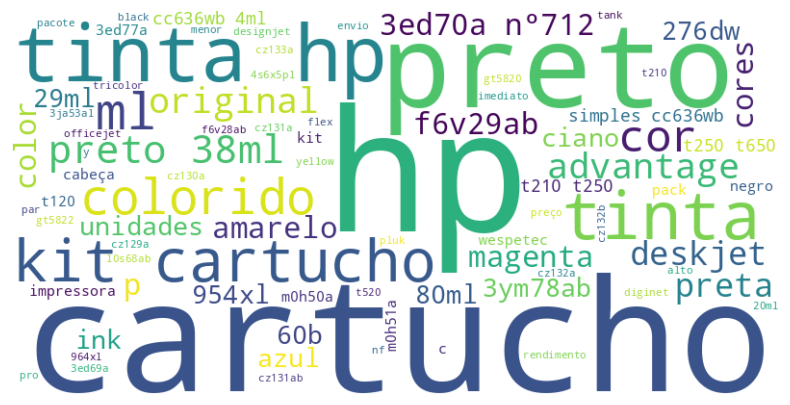

In [77]:
import pandas as pd
from stop_words import get_stop_words
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# 1. Preprocessamento: títulos em minúsculo
text = df['title'].astype(str).str.lower()

# 2. Carrega stop-words em português
stopwords_pt = get_stop_words('portuguese')

# 3. Vetorização com remoção das stop-words
vectorizer = CountVectorizer(stop_words=stopwords_pt)
X = vectorizer.fit_transform(text)

# 4. Cálculo de frequências
freq = X.toarray().sum(axis=0)
words = pd.Series(freq, index=vectorizer.get_feature_names_out()).sort_values(ascending=False)

print("Top 10 palavras mais frequentes:")
print(words.head(10))

# 5. Geração da nuvem de palavras
wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=set(stopwords_pt)
)
wc.generate(' '.join(text))

# 6. Exibição da figura
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


## Correlações

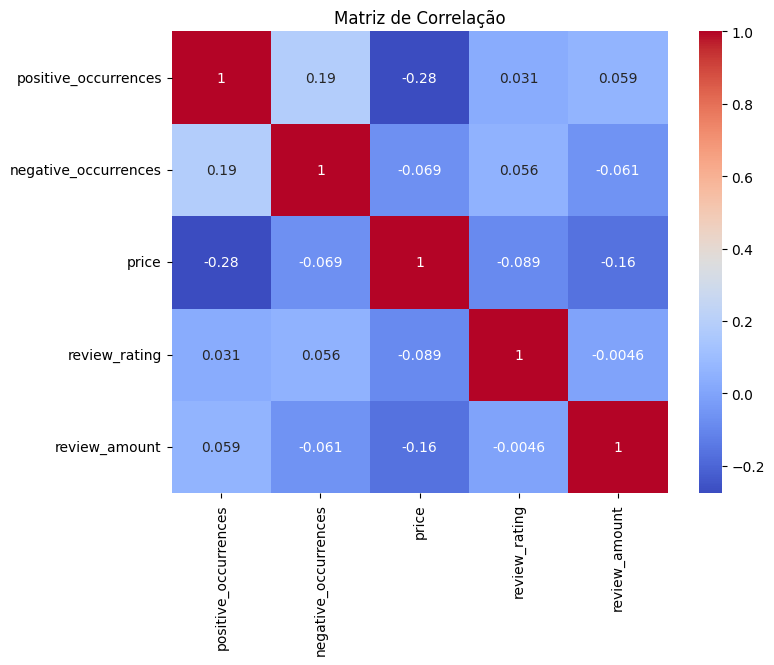

In [78]:
numeric_cols = ['positive_occurrences','negative_occurrences','price','review_rating','review_amount']
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

## Conclusões

* Preços variam de acordo com o tipo de cartucho e vendedores.
* Palavras mais frequentes destacam modelos específicos.
* Não há fortes correlações entre preço e outras variáveis, indicando que outros fatores influenciam a classificação.